## Lana Del Rey Music Analysis

Connect to Spotify API and load data in 

In [18]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Spotify application credentials
client_id = 'your_client_id'
client_secret = 'your_client_secret'
redirect_uri = 'http://localhost:8888/callback'  # This should match the redirect URI in your Spotify Developer Dashboard
scope = 'user-library-read'  # Example scope for reading user's library

# Create SpotifyOAuth instance
sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope)

# Retrieve access token
token_info = sp_oauth.get_access_token()

# Initialize Spotify API object
sp = spotipy.Spotify(auth=token_info['access_token'])

# Function to fetch tracks for an album
def fetch_album_tracks(album_id):
    tracks = []
    album_tracks = sp.album_tracks(album_id)
    for track in album_tracks['items']:
        track_data = {
            'Track Name': track['name'],
            'Track Popularity': sp.track(track['id'])['popularity'],  # Fetch popularity for each track
            'Album ID': album_id,
            'Album Name': sp.album(album_id)['name']  # Linking track to album
        }
        tracks.append(track_data)
    return tracks

# Example: Fetch Lana Del Rey's albums
results = sp.search(q='artist:Lana Del Rey', type='album', limit=50)

# Initialize lists to store album and track data
albums_data = []
tracks_data = []

# Iterate over each album in the results
for album in results['albums']['items']:
    # Extract album details
    album_data = {
        'Album Name': album['name'],
        'Release Date': album['release_date'],
        'Total Tracks': album['total_tracks'],
        'Album Type': album['album_type']
    }
    albums_data.append(album_data)
    
    # Fetch and append tracks for the current album
    tracks_data.extend(fetch_album_tracks(album['id']))

# Convert albums data into Pandas DataFrame
albums_df = pd.DataFrame(albums_data)

# Convert tracks data into Pandas DataFrame
tracks_df = pd.DataFrame(tracks_data)

# Display the DataFrames
print("DataFrame of Lana Del Rey's Albums:")
print(albums_df)

print("\nDataFrame of Lana Del Rey's Tracks:")
print(tracks_df)

C:\Users\rc13736\AppData\Local\Temp\ipykernel_69628\636155906.py:15: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token()


DataFrame of Lana Del Rey's Albums:
                                           Album Name Release Date  \
0                  Summertime Sadness (Imanbek Remix)   2013-03-07   
1                                             Arcadia   2021-09-08   
2                                          West Coast   2014-01-01   
3                                         Born To Die   2012-01-30   
4                                       Ultraviolence   2014-01-01   
5                                 Video Games Remixes   2012-01-01   
6                                         Born To Die   2012-01-30   
7                                           Honeymoon   2015-09-18   
8                        Summertime Sadness (Sped Up)   2022-09-26   
9                                            Paradise   2012-11-09   
10                                     Blue Banisters   2021-05-20   
11                                     Burning Desire   2013-03-19   
12                                Young And Beautiful 

Take a look at the data

In [22]:
albums_df.head(10)

,Album Name,Release Date,Total Tracks,Album Type
0,Summertime Sadness (Imanbek Remix),2013-03-07,1,single
1,Arcadia,2021-09-08,1,single
2,West Coast,2014-01-01,1,single
3,Born To Die,2012-01-30,13,album
4,Ultraviolence,2014-01-01,11,album
5,Video Games Remixes,2012-01-01,5,single
6,Born To Die,2012-01-30,12,album
7,Honeymoon,2015-09-18,14,album
8,Summertime Sadness (Sped Up),2022-09-26,2,single
9,Paradise,2012-11-09,8,album


In [24]:
tracks_df.head(10)

,Track Name,Track Popularity,Album ID,Album Name
0,Summertime - Imanbek Remix,52,5XRtJEsQ1jLvOkQZdBjPZZ,Summertime Sadness (Imanbek Remix)
1,Arcadia,48,2AVn0YgzBtqsa0d6R5QD95,Arcadia
2,West Coast,49,4QFIONlzC0kTAkrJFP8Z0R,West Coast
3,Born To Die,52,4X8hAqIWpQyQks2yRhyqs4,Born To Die
4,Off To The Races,48,4X8hAqIWpQyQks2yRhyqs4,Born To Die
5,Blue Jeans,48,4X8hAqIWpQyQks2yRhyqs4,Born To Die
6,Video Games,50,4X8hAqIWpQyQks2yRhyqs4,Born To Die
7,Diet Mountain Dew,53,4X8hAqIWpQyQks2yRhyqs4,Born To Die
8,National Anthem,52,4X8hAqIWpQyQks2yRhyqs4,Born To Die
9,Dark Paradise,47,4X8hAqIWpQyQks2yRhyqs4,Born To Die


Sort by Popularity

In [41]:
tracks_df_sorted = tracks_df.sort_values(by='Track Popularity', ascending=True)

In [37]:
tracks_df_sorted

,Track Name,Track Popularity,Album ID,Album Name
222,(Everything But) Her Love,21,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
117,13 Beaches,60,7xYiTrbTL57QO0bb4hXIKo,Lust For Life
55,24,57,2DpEBrjCur1ythIZ10gJWw,Honeymoon
195,A&W,69,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...
88,American,48,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version)
...,...,...,...,...
190,Yayo,45,5PW8nAtvf2HV8RYZFd4IrX,Born To Die - The Paradise Edition
215,Yosemite,56,6QeosPQpJckkW0Obir5RT8,Chemtrails Over The Country Club
70,Young And Beautiful,84,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
230,Young And Beautiful [Lana Del Rey vs. Cedric G...,41,02duSuiRA2CHxrCdeRUHz5,Young And Beautiful [Lana Del Rey vs. Cedric G...


Summary Statistics

In [57]:
tracks_df.describe()

,Track Popularity
count,275.000000
mean,52.563636
std,13.426692
min,20.000000
25%,43.000000
50%,53.000000
75%,62.000000
max,84.000000


In [49]:
average_popularity = tracks_df['Track Popularity'].mean()
average_popularity

52.56363636363636

Extract most popular 5 songs

In [53]:
most_popular_songs = tracks_df.nlargest(5, 'Track Popularity')
most_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
70,Young And Beautiful,84,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
131,Say Yes To Heaven,84,6jVg0POvGYH1Pt6lISl3ok,Say Yes To Heaven
137,West Coast,82,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
157,Cinnamon Girl,81,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
136,Brooklyn Baby,80,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)


Extract least popular 5 songs

In [55]:
least_popular_songs = tracks_df.nsmallest(5, 'Track Popularity')
least_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
30,Video Games - Jamie Woon Remix,20,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
222,(Everything But) Her Love,21,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
223,Chloë,21,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
28,Video Games - Jakwob and Etherwood Remix,22,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
97,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,23,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...


Extracting Remix Tracks

In [61]:
remix_tracks = tracks_df[tracks_df['Track Name'].str.contains('remix', case=False)]
remix_tracks

,Track Name,Track Popularity,Album ID,Album Name
0,Summertime - Imanbek Remix,52,5XRtJEsQ1jLvOkQZdBjPZZ,Summertime Sadness (Imanbek Remix)
15,Born To Die - Woodkid & The Shoes Remix,38,4X8hAqIWpQyQks2yRhyqs4,Born To Die
27,Video Games - Club Clique For The Bad Girls Remix,33,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
28,Video Games - Jakwob and Etherwood Remix,22,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
30,Video Games - Jamie Woon Remix,20,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
31,Video Games - We Don’t Belong In Pacha Remix,26,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
97,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,23,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...
147,Lust For Life - BloodPop® Remix,40,3RQdSuT8Y2WGynwlFrJI58,Lust For Life (BloodPop® Remix)
149,Summer Bummer - Clams Casino Remix,37,3gY2PiLHPaOmYApYJYPpIi,Summer Bummer (Clams Casino Remix)
168,Say Yes To Heaven - Anyma Remix,60,35ZI8inROOaI4YkvOmCSLq,Say Yes To Heaven (Anyma Remix)


Visualizing Remix Track Popularity

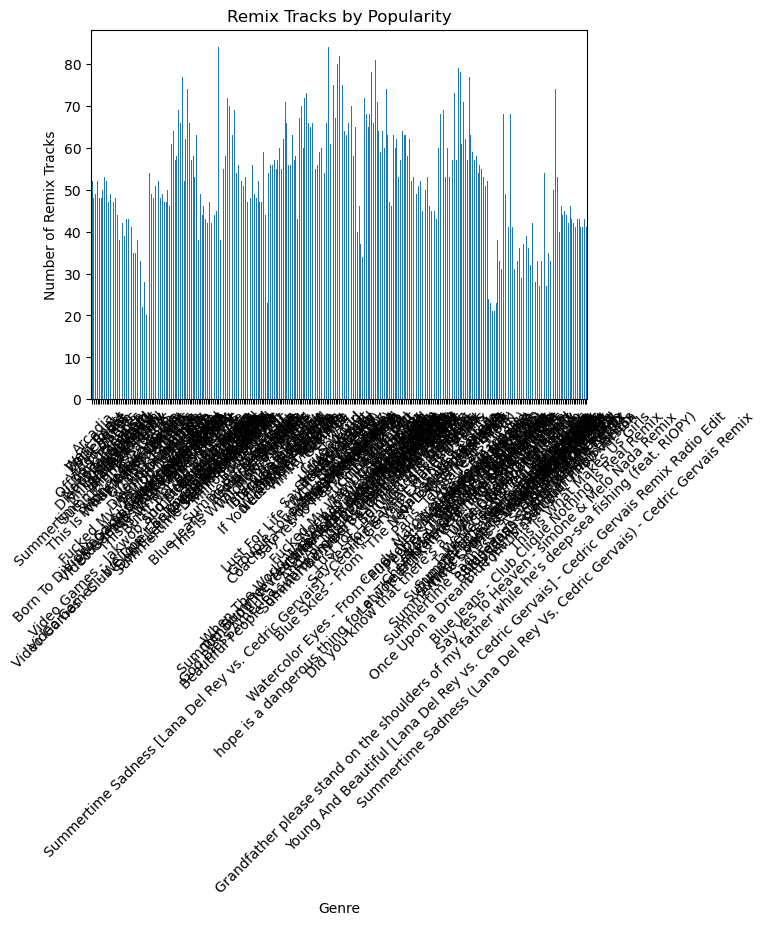

In [71]:
import matplotlib.pyplot as plt

# Plotting
tracks_df.plot(kind='bar', x='Track Name', y='Track Popularity', legend=None)
plt.title('Remix Tracks by Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Remix Tracks')
plt.xticks(rotation=45)
plt.show()